<div class="alert alert-block" style="color: green">
    <h1><center> DAKD 2024 EXERCISE 2: SUPERVISED LEARNING  </center></h1>

### Fill in your name, student id number and email address
#### name: Mst Ayesha Sultana
#### student id: 2406862
#### email: ayesha.m.sultana@utu.fi

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about the data, so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM), which is <font color = green>modeling</font>.

The questions to be answered at this stage could include:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve its performance?
- How do we evaluate the model's performance?

<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should never forget it in your future data analyses</i>.

-----

#### General Guidance for Exercises

- <b>Complete all tasks:</b> Make sure to answer all questions, even if you cannot get your script to fully work.
- <b>Code clarity:</b> Write clear and readable code. Include comments to explain what your code does.
- <b>Effective visualizations:</b> Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- <b>Notebook organization:</b> You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- <b>Submission:</b> Submit both the .ipynb and .html or .pdf versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.
- <b>Grading criteria:</b>
    - The grading scale is *Fail*/*Pass*/*Pass with honors* (+1).
    - To pass, you must complete the required parts 1-4.
    - To achieve Pass with honors, complete the bonus exercises.
- <b>Technical issues:</b>
    - If you encounter problems, start with an online search to find solutions but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
    - Cite all external sources used, whether for code or explanations.
    - If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email at tuhlei@utu.fi, aibekt@utu.fi.
- <b>Use of AI and large language models:</b>
    - We do not encourage the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
    - Describe how you used the AI tools in your work, including your input and how the output was beneficial.
- <b>Time management:</b> Do not leave your work until the last moment. No feedback will be available during weekends.
- <b>Additional notes:</b>
    - You can find the specific deadlines and session times for each assignment on the Moodle course page.
    - Ensure all your answers are concise—typically a few sentences per question.
    - Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.
 are run in sequence.


<font color = green> The guided exercise session is held on the 27th of November at 14:15-16:00, at lecture hall X, Natura building.</font>

<font color = red size = 4>The deadline is the 2nd of December at 23:59</font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### <font color = red> Packages needed for this exercise: </font>

You can use other packages as well, but this excercise can be completed with those below.

In [1]:
import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is a classic supervised machine learning technique based on the assumption that data points with similar features tend to belong to the same class, and thus are likely to be near each other in feature space.

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`. Let's have a brief look at the features again:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in years 
| sex | binary | Female == 0, Male == 1
| height | numeric | Measured weight of the patient (kg)
| weight | numeric | Measured weight of the patient (cm)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| alco | binary | A subjective feature based on asking the patient whether or not he/she consumes alcohol
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| gluc | categorical | Glucose associated risk information evaluated by a doctor

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1000 rows from the dataframe using a fixed random seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: As mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's a new variable, `gluc` (about glucose aka blood sugar levels), which is also one-hot-encoded for you. It has similar values as `cholesterol`.*


In [2]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [3]:
### Code - Resample and print 15 rows

# Random sample of 1000 rows with a fixed random seed 55
df = cardio_data.sample(n=1000, random_state=55)

# Printing the first 15 rows
df.head(15)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_at_risk,cholesterol_elevated,gluc_normal,gluc_at_risk,gluc_elevated
1710,43,1,172,78.0,130,70,0,0,1,0,1,0,0,1,0,0
2921,44,0,150,70.0,100,70,0,0,0,0,1,0,0,1,0,0
5660,43,0,155,50.0,120,80,0,0,1,1,1,0,0,1,0,0
1371,53,0,167,61.0,110,70,0,0,1,0,1,0,0,1,0,0
3477,52,0,167,69.0,120,80,0,0,1,0,1,0,0,1,0,0
5866,47,1,178,84.0,190,60,0,0,1,1,1,0,0,1,0,0
4662,52,0,159,74.0,130,90,0,0,1,1,1,0,0,1,0,0
2410,60,1,170,107.0,120,80,0,0,1,0,1,0,0,1,0,0
2714,44,1,167,70.0,120,80,1,0,1,0,1,0,0,1,0,0
5913,56,0,159,92.0,110,80,0,0,0,1,1,0,0,1,0,0


Descriptive Statistics and Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1710 to 815
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   sex                   1000 non-null   int64  
 2   height                1000 non-null   int64  
 3   weight                1000 non-null   float64
 4   ap_hi                 1000 non-null   int64  
 5   ap_lo                 1000 non-null   int64  
 6   smoke                 1000 non-null   int64  
 7   alco                  1000 non-null   int64  
 8   active                1000 non-null   int64  
 9   cardio                1000 non-null   int64  
 10  cholesterol_normal    1000 non-null   int64  
 11  cholesterol_at_risk   1000 non-null   int64  
 12  cholesterol_elevated  1000 non-null   int64  
 13  gluc_normal           1000 non-null   int64  
 14  gluc_at_risk          1000 non-null   int64  
 15  gluc_elevated         10

There are no null values on the data set.
However, from the dtypes we can see that some boolean features are given as integer type. We need to convert the types to boolean.

In [5]:
numerical_feature = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
binary_feature = ['sex', 'smoke', 'alco', 'active', 'cholesterol_normal', 'cholesterol_at_risk', 'cholesterol_elevated', 'gluc_normal', 'gluc_at_risk', 'gluc_elevated']
target_feature = ['cardio']

df[binary_feature] = df[binary_feature].astype(pd.BooleanDtype())
df[target_feature] = df[target_feature].astype(pd.BooleanDtype())

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1710 to 815
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   sex                   1000 non-null   boolean
 2   height                1000 non-null   int64  
 3   weight                1000 non-null   float64
 4   ap_hi                 1000 non-null   int64  
 5   ap_lo                 1000 non-null   int64  
 6   smoke                 1000 non-null   boolean
 7   alco                  1000 non-null   boolean
 8   active                1000 non-null   boolean
 9   cardio                1000 non-null   boolean
 10  cholesterol_normal    1000 non-null   boolean
 11  cholesterol_at_risk   1000 non-null   boolean
 12  cholesterol_elevated  1000 non-null   boolean
 13  gluc_normal           1000 non-null   boolean
 14  gluc_at_risk          1000 non-null   boolean
 15  gluc_elevated         10

In [6]:
df.describe()

,age,height,weight,ap_hi,ap_lo
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,52.262000,163.926000,73.067100,137.75700,89.371000
std,6.724922,8.311775,14.223446,439.77848,91.355499
min,39.000000,68.000000,33.000000,12.00000,20.000000
25%,47.000000,158.000000,64.000000,120.00000,80.000000
50%,53.000000,164.000000,71.000000,120.00000,80.000000
75%,57.000000,169.000000,80.000000,130.00000,80.000000
max,64.000000,197.000000,165.000000,14020.00000,1100.000000


From the description we can see that, the minimum value and maximum value of ap_hi and ap_lo is not valid. Print the unique values and update accordingly. 

In [7]:
ap_hi_value = df['ap_hi'].value_counts()

print("All unique values of ap_hi:")
print(", ".join(map(str, ap_hi_value.index)))

All unique values of ap_hi:
120, 110, 130, 140, 100, 150, 160, 90, 190, 170, 180, 125, 105, 80, 115, 145, 12, 109, 146, 165, 154, 123, 14020, 13, 135, 124, 121, 95, 128


There are some invalid values like 12, 13, 14020.
This can happen due to typing mistake. Replace the value with a approximate value.

In [8]:
df['ap_hi'] = df['ap_hi'].replace(13, 130)
df['ap_hi'] = df['ap_hi'].replace(12, 120)
df['ap_hi'] = df['ap_hi'].replace(14020, 140)

ap_hi_value = df['ap_hi'].value_counts()
print("Updated unique values of ap_hi:")
print(", ".join(map(str, ap_hi_value.index)))

Updated unique values of ap_hi:
120, 110, 130, 140, 100, 150, 160, 90, 170, 190, 125, 180, 105, 115, 80, 145, 109, 146, 165, 154, 123, 135, 124, 121, 95, 128


In [9]:
ap_lo_value = df['ap_lo'].value_counts()

print("All unique values of ap_lo:")
print(", ".join(map(str, ap_lo_value.index)))

All unique values of ap_lo:
80, 90, 70, 60, 100, 1000, 110, 69, 79, 120, 95, 75, 89, 130, 68, 1001, 20, 87, 801, 83, 73, 85, 74, 82, 94, 86, 61, 1100, 59


There are some invalid values like 1000, 1001, 801, 1100.
This can happen due to typing mistake. Replace the value with a approximate value.

In [10]:
df['ap_lo'] = df['ap_lo'].replace(1000, 100)
df['ap_lo'] = df['ap_lo'].replace(1001, 100)
df['ap_lo'] = df['ap_lo'].replace(801, 80)
df['ap_lo'] = df['ap_lo'].replace(1100, 110)

ap_lo_value = df['ap_lo'].value_counts()
print("Updated unique values of ap_lo:")
print(", ".join(map(str, ap_lo_value.index)))

Updated unique values of ap_lo:
80, 90, 70, 60, 100, 110, 69, 79, 120, 75, 95, 130, 89, 68, 20, 73, 87, 74, 83, 82, 85, 94, 86, 61, 59


In [11]:
# Again checking the details from df.describe() method
df.describe()

,age,height,weight,ap_hi,ap_lo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.262000,163.926000,73.067100,124.210000,80.459000
std,6.724922,8.311775,14.223446,16.287455,9.797975
min,39.000000,68.000000,33.000000,80.000000,20.000000
25%,47.000000,158.000000,64.000000,120.000000,80.000000
50%,53.000000,164.000000,71.000000,120.000000,80.000000
75%,57.000000,169.000000,80.000000,130.000000,80.000000
max,64.000000,197.000000,165.000000,190.000000,130.000000


----

We have the data so now, let's put it to use. All the analyses will be done based on this sample of 1000.

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

Before the exercise itself, we might as well discuss about the reproducibility of experiments we conduct in research. It can be quite a nightmare for some if code spewed out only random results. To address this, we can set a **random seed** to ensure that any random processes, such as splitting our dataset into training and test sets, yield consistent results across multiple runs. By using a fixed random seed, we enhance the reproducibility of our experiments, making it easier to validate findings. In fact, we already used one when sampling our subset from the loaded dataset.

**Exercise 1 B)**

Gather the features into one array and the target variable into another array. Create training and test data by splitting the data into training (80%) and test (20%) sets. Use a fixed random seed to ensure that even if you execute this cell hundreds of times, you will get the same split each time.

- Do you need stratification for our dataset? Explain your decision.

In [12]:
### Code - Train-test split

# Feature array
x = df.drop(['cardio'], axis='columns')

# Target variable array
y = df.cardio

# Creating training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

<font color = lightcoral> \<Write your answer here\></font>

Yes, we need stratification for our dataset. The training and testing datasets should both be equal proportion of positive and negative cases for classification. By using stratification, we can confirm that the data have similar distribution on the training and testing datasets. Thus, the model can perform a more accurate and balanced performance for both classes. 

----------

**Exercise 1 C)** 

Standardize the numerical features in both the train and test sets.

- Explain how the k-NN model makes predictions about whether or not a patient has cardiovascular disease (CVD) when the features are not standardized. Specifically, discuss how the varying scales of different features can influence the model's predictions, and how standardization would change this influence.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [13]:
### Code - Standardization

# Standardize the numerical features
scaler = StandardScaler()
x_train_numerical_scaled = scaler.fit_transform(x_train[numerical_feature])
x_test_numerical_scaled = scaler.transform(x_test[numerical_feature])

# Storing scaled  training data
x_train_scaled = pd.DataFrame(x_train_numerical_scaled, columns=numerical_feature, index=x_train.index)
x_train_standardized = pd.concat([x_train_scaled, x_train[binary_feature]], axis=1)

# Storing scaled testing data
x_test_scaled = pd.DataFrame(x_test_numerical_scaled, columns=numerical_feature, index=x_test.index)
x_test_standardized = pd.concat([x_test_scaled, x_test[binary_feature]], axis=1)

<font color = lightcoral> \<Write your answer here\></font>

The **k-NN algorithm** calculates the distance (usually Euclidean distance) between new instance and all other instance in the data set, then selects the k closest neighbors to determine the predicted class.

When features are not standardized, their scale can vary greatly. Which significantly affects the **Euclidean distance** calculation. For example, the feature 'Age' can be range from 20 to 80 years and 'Diastolic blood pressure' ranges from 150 to 240 mm Hg. 

When features are not standardized, feature with larger ranges will dominate the Euclidean distance calculation, even if they are less relevant to predicting cardio vascular diseases(CVD) and features with smaller ranges will have less influence even they are highly predictive of CVD.

Standardization scales all features to have **Mean** = 0 and **Standard Deviation** = 1. 
After standardization, original range of 'Age' and 'Diastolic blood pressure' becomes -2 to 2.

That ensures that the k-NN model is not biased toward features with large scales. The model considers all features equally and reflect the true relationships between features and CVD.

-------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

*Note: We are very aware that there are functions available for these metrics, but this time, please calculate them using the confusion matrix.*

In [14]:
### Code - the kNN classifier

# Train the mode with training dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_standardized, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Calculate the mean accuracy on the given test data
knn.score(x_test_standardized, y_test)

0.735

Confusion matrix: 
 [[122  16]
 [ 37  25]]


Text(58.222222222222214, 0.5, 'Truth')

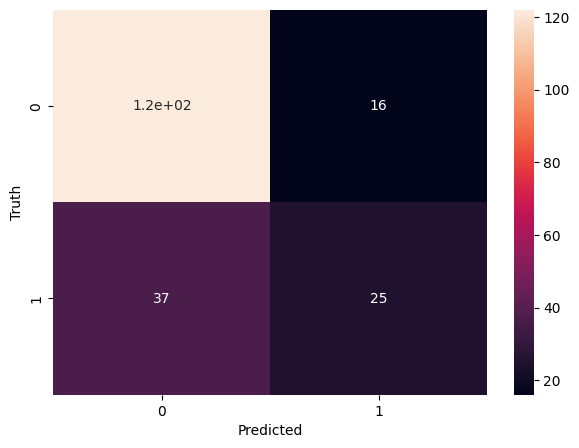

In [16]:
# Predict the class label
y_pred = knn.predict(x_test_standardized)

# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

print(f"Confusion matrix: \n {cm}")

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)

plt.xlabel("Predicted")
plt.ylabel('Truth')

In [17]:
#Compute the accuracy, precision and recall

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100}%")
print(f"Precision: {(precision * 100):.2f}%")
print(f"Recall: {(recall * 100):.2f}%")

Accuracy: 73.5%
Precision: 60.98%
Recall: 40.32%


<font color = lightcoral> \<Write your answer here\></font>

**Each cell represent the following:**

1. True negative (122): The model correctly predicted 122 instance as negative.
2. False positives (16): The model incorrectly predicted 16 cases positive, but actually those are negative.
3. False negative (37): The model incorrectly predicted 37 instance as negative but actually those are positive.
4. True positives (25): The mode correctly predicted 25 instance as positive.

**The model performed well on the negative class but not enough well for the positive class.**

Interpret the performance metrics:
1. The model is biased towards the negative class.
2. The low recall(40.32%) suggests that the model fails to capture a significant portion of positive cases.
3. Accuracy is misleading when the classes are unbalanced.
4. A precision of 60.98% indicates that the model is not highly reliable when predicting positives.

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire sample of 1000 on this task.

- What can you say about the accuracy compared to the previous task?
- What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This can certainly be done manually, but `cross_val_score` is also a very handy function.*

In [18]:
### Code - Leave-one-out cross-validation


# Feature array
x = df.drop(['cardio'], axis='columns')

# Target variable array
y = df.cardio

# Standardized the numerical features
scaler = StandardScaler()
x_numerical_scaled = scaler.fit_transform(x[numerical_feature])

# Convert the scaled data into a data frame 
x_scaled = pd.DataFrame(x_numerical_scaled, columns=numerical_feature, index=x.index)
x_standardized = pd.concat([x_scaled, x[binary_feature]], axis=1)

# k-NN model
knn = KNeighborsClassifier(n_neighbors=3)

# The dataset is divided into 5 folds. For each fold, the model will be trained on 4 folds and tested  on the remaining fold. This process will repeat 5 times.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# cross_val_score computes the accuracy scores for each fold
loo_scores = cross_val_score(knn, x_standardized, y, cv=skf, scoring='accuracy')
print(f"The accuracy value obtain from the cross_val_score are {loo_scores}")

# Calculate the mean accuracy
mean_accuracy = (0.69 + 0.715 + 0.66 + 0.71 + 0.72) / 5
print(f"Mean accuracy: {(mean_accuracy) * 100}%")


The accuracy value obtain from the cross_val_score are [0.69  0.715 0.66  0.71  0.72 ]
Mean accuracy: 69.9%


<font color = royalblue> \<Write your answer here\></font>

**Comparing to the previous task:**

With train-test split the accuracy was 73.5%. That means the model performed slightly better with a fixed train-test split than the Leave-one-out Cross-Validation (LOO-CV).
In Stratified K-Fold CV, each fold tests the model on a smaller subset of data (20% in each fold), and this tends to provide lower estimate of accuracy due to the greater variance in the test data.

**Evaluating k-NN model for the problem**

Although it performs rather well, the k-NN model is not the best choice for this problem. Despite the accuracy (73.5) is respectable, the prior task's low recall and precision indicate that k-NN has some trouble in accuracy detecting cardiovascular disease. This is crucial in medical applications, because reducing missed diagnoses (false negatives) and unnecessary treatment (false positives) requires both precision and recall.

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters, such as the used distance measure. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k, and use default values for all the other hyperparameters. 

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire sample of 1000 on this task.

- Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [19]:
### Code - Select best model

# A list to store the accuracy values for each value of K
accuracies = []

# The dataset is divided into 5 folds. For each fold, the model will be trained on 4 folds and tested  on the remaining fold. This process will repeat 5 times.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for k in range(1, 31):
    #k-NN model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # cross_val_score computes the accuracy scores for each fold
    loo_scores = cross_val_score(knn, x_standardized, y, cv=skf, scoring='accuracy')
    
    # Storing all accuracy scores from k - 1 to 30
    accuracies.append(loo_scores.mean())

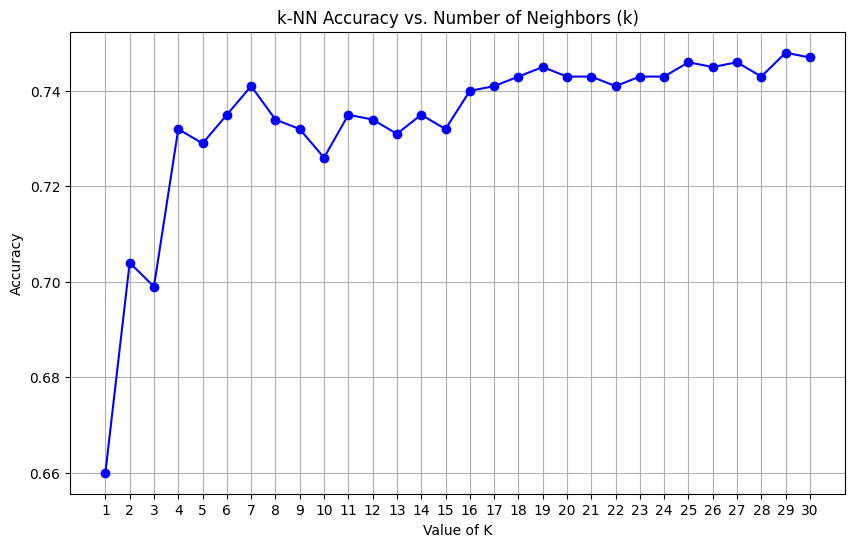

In [20]:
### Code - Plot the accuracies vs. the values for k
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()

In [21]:
# Select maximum vale of k from the accuracies list
best_k = accuracies.index(max(accuracies)) + 1  # +1 because k starts at 1
print(f"The best value of k with high accuracy is k = {best_k}")
print(f"Accuracy of the model: {accuracies[best_k - 1] * 100:.2f}%")

The best value of k with high accuracy is k = 29
Accuracy of the model: 74.80%


<font color = green>\<Write your answer here\></font>

**Best accuracy found with K = 29 using leave-one-out cross validation**

- In comparison, the previous model with k = 3 achieved 69.9%, which shows that a higher k improves the model's performance.
- This improvement suggests that for this dataset, considering more neighbors leads to better generalization and a more robust prediction model.

**Limit of Accuracy**

If k increases further, the accuracy will eventually decrease slightly.

**Reason:** When k becomes very large, the model essentially uses all data points to make predictions. It increasingly resembles a majority vote classifier, where the class with the most samples dominates all predictions. This reduce the model's ability to account for local data patterns and increase the bias.

**Impact of choosing a very small or very large number of neighbors on the k-NN model's ability**

**Very Small k:**
- Capture local variations and fine-grained patters in the data but highly prone to overfitting and noise sensitivity since predictions rely solely on the nearest neighbor.
- While it can distinguish subtle differences between individuals and making it more sensitive to outliers, for CVD detection, this could result in a high number of false positives or negatives due to over-reliance in individual points.

**Very Large k:**
- Although it can be more robust to outliers and noise as predictions are based on a large number of neighbors, it may fail to capture meaningful local patterns, leading to underfiting.
- In one side it may reduce variance and provide more stable predictions, but in other side it becomes overly general and biased towards the majority class, making it less effective for identifying minority cases like CVD patients.

_____________________

## <font color = darkorange> 4. Ridge regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression - as we are changing our main goal from predicting discrete classes (healthy/sick) to estimating continuous values. The following exercises are going to involve utilizing one regression model, <font color = darkorange>Ridge Regression</font>, and our goal is to evaluate the performance of this model. 

Let's change the dataset to make the following exercises more intuitive. The new dataset is about brushtail possums and it includes variables such as


| Feature | Type | Explanation |
| :- | :- | :-
|sex|binary| Sex, either male (0) or female (1)
|age|numeric| Age in years
|len_head|numeric| Head length in mm
|width_skull|numeric| Skull width in mm
|len_earconch|numeric| Ear conch length in mm
|width_eye|numeric| Distance from medial canthus to lateral canthusof right eye, i.e., eye width in mm
|len_foot|numeric| Foot length in mm
|len_tail|numeric| Tail length in mm
|chest|numeric| Chest grit in mm
|belly |numeric| Belly grit in mm
|len_total|numeric| Total length in mm

In this case, our target variable will be *the age of the possum*. The data for this exercise has been modified from the original source.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [22]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)

Checking the first five rows of the dataset

In [23]:
possum_data.head()

,sex,age,len_head,width_skull,len_earconch,width_eye,len_foot,len_tail,chest,belly,len_total
0,0,8.0,94.1,60.4,54.5,15.2,74.5,360.0,280.0,360.0,890.0
1,1,6.0,92.5,57.6,51.2,16.0,72.5,365.0,285.0,330.0,915.0
2,1,6.0,94.0,60.0,51.9,15.5,75.4,390.0,300.0,340.0,955.0
3,1,6.0,93.2,57.1,52.2,15.2,76.1,380.0,280.0,340.0,920.0
4,1,2.0,91.5,56.3,53.2,15.1,71.0,360.0,285.0,330.0,855.0


Checking the datatypes and non null count

In [24]:
possum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           101 non-null    int64  
 1   age           101 non-null    float64
 2   len_head      101 non-null    float64
 3   width_skull   101 non-null    float64
 4   len_earconch  101 non-null    float64
 5   width_eye     101 non-null    float64
 6   len_foot      101 non-null    float64
 7   len_tail      101 non-null    float64
 8   chest         101 non-null    float64
 9   belly         101 non-null    float64
 10  len_total     101 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 8.8 KB


-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. For example, we could examine how a change in possum's total length affects, on average, its estimated age.

We start by examining those relationships between the variables in the given dataset.


**Exercise 4 A)**

Plot pairwise relationships between the age variable and the others where you color the samples based on the sex variable. 

- Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?
- Are there any differences in the correlations between males and females?

*Tip: `seaborn.pairplot()` is handy with the parameters `(x,y)_vars` and `hue`. You actually can fit a linear model to draw a regression line with the parameter `kind` set to `"reg"`.*

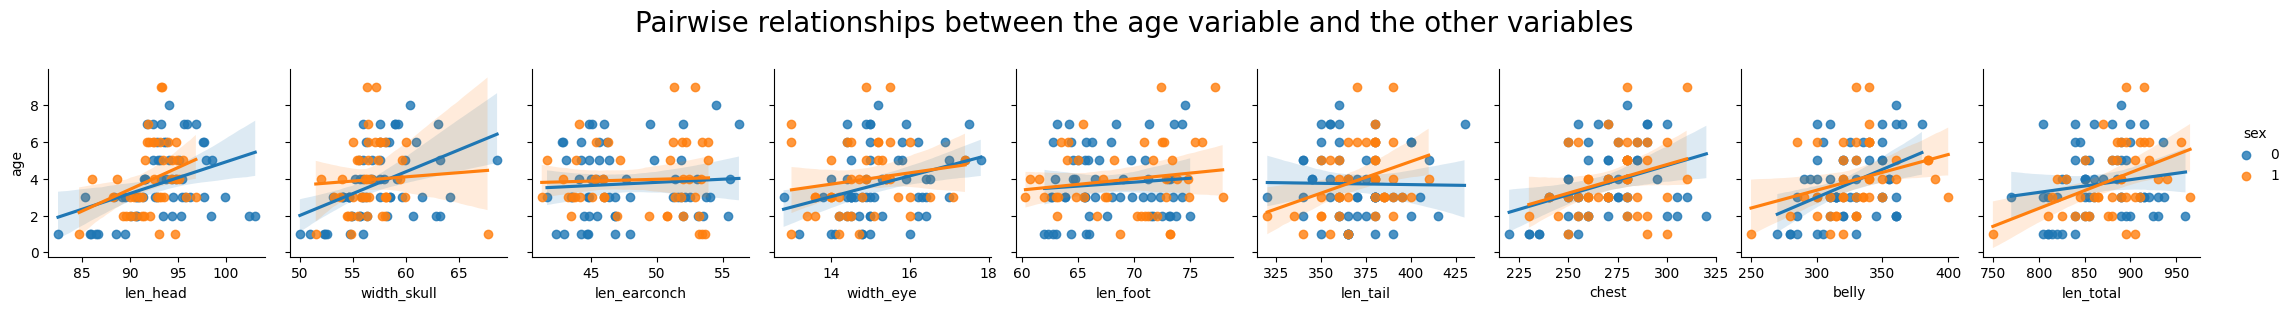

In [25]:
### Code - Pairplot

# List of body features from the given dataset
body_features = list(possum_data.columns)

# Removing 'age' from the list as we need to show the pairwise relation between the age variable and others
body_features.remove('age')

# And removing sex variable as we need to color the sample based on the 'sex' variable
body_features.remove('sex')

# Pairplot
sns.pairplot(
    data=possum_data,
    x_vars=body_features,
    y_vars=['age'],
    hue='sex', 
    kind='reg',
    height=2.5, 
    aspect=1
)

# Add a super title for the entire figure with a specific vertical position and font size
plt.suptitle("Pairwise relationships between the age variable and the other variables", y=1.20, fontsize=20)
plt.show()

<font color = darkorange>\<Write your answer here\></font>

**1. The features which are most correlated with age:**
- len_total vs age: This pair shows a sting positive correlation for both male and female, as age increases the total body length also increases significantly.
- len_tail vs age: This pair also shows a noticeable positive correlation.

**2. The features with no correlation:**
- width_eye, width_skull, len_earconch show a very week or no clear relationship with age.

**3. Differences in the correlations between males and females**
- For some variable, len_total and len_tail, the female group appears to have a stronger and more consistent compared to the male group.
- And for some variables width_eye, len_earconch, males show little to no correlation with age.

------

Before the regression analysis itself, let's check that our dataset is in a proper format. We'll also perform the train-test split as we're going to test the overall performance of the model using the test set.

**Exercise 4 B)**

Do you need to prepare the data a little? Explain your decision. Perform the train-test (80/20) split. 

*Note: Set the features in the dataframe named as `possum_X` so you can play around with the upcoming code snippet.*

In [26]:
possum_data.describe()

,sex,age,len_head,width_skull,len_earconch,width_eye,len_foot,len_tail,chest,belly,len_total
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.415842,3.821782,92.730693,56.960396,48.133663,15.050495,68.398020,370.495050,270.643564,326.386139,872.693069
std,0.495325,1.915182,3.518714,3.102679,4.060352,1.058643,4.413502,19.716807,20.207219,27.277452,41.968022
min,0.000000,1.000000,82.500000,50.000000,41.300000,12.800000,60.300000,320.000000,220.000000,250.000000,750.000000
25%,0.000000,2.000000,90.700000,55.000000,44.800000,14.400000,64.500000,360.000000,255.000000,310.000000,845.000000
50%,0.000000,3.000000,92.900000,56.400000,46.800000,14.900000,67.900000,370.000000,270.000000,325.000000,880.000000
75%,1.000000,5.000000,94.800000,58.100000,52.000000,15.700000,72.500000,380.000000,280.000000,340.000000,900.000000
max,1.000000,9.000000,103.100000,68.600000,56.200000,17.800000,77.900000,430.000000,320.000000,400.000000,965.000000


In [27]:
### Code - Data preparation

# Remove missing values (if any)
df_cleaned = possum_data.dropna()

# Separate features (X) and target (y)
possum_X = df_cleaned.drop(columns=['age'])  # Dropping 'age' as it's the target
possum_y = df_cleaned['age']  # Target variable

# Split the data into training and testing sets (80/20)
possum_X_train, possum_X_test, possum_y_train, possum_y_test = train_test_split(possum_X, possum_y, test_size=0.2, random_state=42)

# Check the split data
print(f"Training features shape: {possum_X_train.shape}")
print(f"Testing features shape: {possum_X_test.shape}")

Training features shape: (80, 10)
Testing features shape: (21, 10)


In [28]:
# Standardize the features
scaler = StandardScaler()
possum_X_train_scaled = scaler.fit_transform(possum_X_train)
possum_X_test_scaled = scaler.transform(possum_X_test)

# Storing scaled  training data
possum_x_train_standardized = pd.DataFrame(possum_X_train_scaled)

# Storing scaled testing data
possum_x_test_standardized = pd.DataFrame(possum_X_test_scaled)

<font color = darkorange>\<Write your answer here\></font>

Yes we need to prepare the data before training. We need to standardized the data before the training.
When features are not standardized, their scale can vary greatly. Which significantly affects the age prediction. 
When features are not standardized, feature with larger ranges will dominate the calculation, even if they are less relevant to predicting the age.

Standardization makes it easier for the model to learn weights for the features, preventing one feature from dominating over others due to its scale. In Ridge regression, standardization ensures that regularization is applied to all features.

------

Regarding Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (read as 'lambda'), the regularization term (or penalty term or L2 penalty, how ever we'd like to call it).

**Exercise 4 C)**

Fit a ridge regression model with the whole training set. For the hyperparameter 'lambda', use 64. Evaluate the model using the test set and describe the results. For evaluating on the test set, use a metric called mean absolute error (MAE).

- How well did the model perform in estimating the possums' ages?
- How do you interpret the MAE in our case when the target variable is age?

In [29]:
## Code - Ridge regression

# Initialize ridge model
ridge_model = Ridge(alpha=64)

# Using training sets fit the model
ridge_model.fit(possum_x_train_standardized, possum_y_train)

Ridge(alpha=64)

In [30]:
# Make predictions on the test set
possum_y_pred = ridge_model.predict(possum_x_test_standardized)

# Evaluate the model using Mean Absolute Error
mae = metrics.mean_absolute_error(possum_y_test, possum_y_pred)

print(f"Mean Absolute Error (MAE) on the test set: {mae:.2f}")

Mean Absolute Error (MAE) on the test set: 1.51


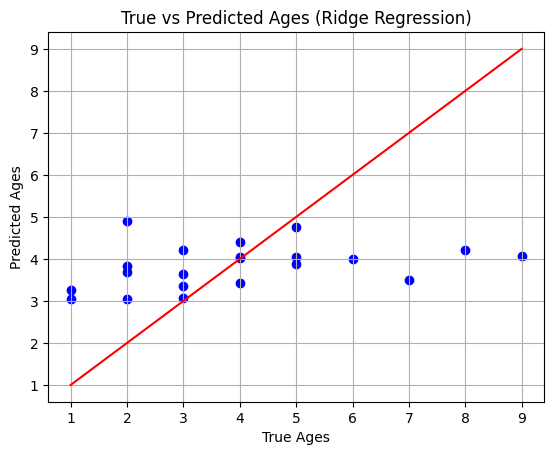

In [31]:
# Visualization
plt.scatter(possum_y_test, possum_y_pred, color='blue')
plt.plot([possum_y_test.min(), possum_y_test.max()], [possum_y_test.min(), possum_y_test.max()], 'r-')
plt.xlabel('True Ages')
plt.ylabel('Predicted Ages')
plt.title('True vs Predicted Ages (Ridge Regression)')
plt.grid(True)
plt.show()

<font color = darkorange>\<Write your answer here\></font>

**Model performance evaluation:**

From the Mean Actual Error, we can say how far the predictions are from the actual on average. In our case, the value 1.51 means that the model's predictions of possums' ages were off by 1.51 years. The model seems to have performed reasonably well if we consider the domain and scale of the data. The MAE 1.51 suggests that the model's predictions are fairly close to the true ages. Given the nature of the problem , this level of error shows that the model provides fairly accurate estimates.

**Interpret the MAE when the target variable is age:**

In the case where the target variable is age, the MAE of 1.51 can be interpreted as the model being, on average, 1.51 years off from the actual age of the possums. Since age is a continuous variable, the MAE represents the average absolute difference between predicted and true ages, making it easy to understand how far off the predictions are in a meaningful way. If the ages of the possums are spread over a wide range, this error might be relatively small. However, if the ages are more tightly clustered, an MAE of 1.51 might represent a larger percentage error, which could be more significant in certain applications.

Now that we have fitted the regression model, let's break it down for better understanding what is actually happening here. Remember that the model here is essentially just a linear regression model with an added regularization term to deal with e.g overfitting and multicollinearity. We can write the equation used by the model to predict an opossum's age as:

$$
\text{Predicted age} = w_1 \times \text{Sex} + w_2 \times \text{Head length} + w_3 \times \text{Skull width} + ... + w_{10} \times \text{Total length} + \text{Bias}
$$

As mentioned earlier, regression focuses on the relationships between the features and the target variable. In the equation above, each feature contibutes a certain amount to the predicted age, based on the weight $w_i$ learned for that feature. For example, if the total length of an opossum has a large positive weight, it suggests that opossums with greater length are predicted to be older. On the other hand, if the skull width of an opossum has a negative weight, it indicates that opossums with wider skulls are predicted to be younger. In this case, as skull width increases, the predicted age decreases.

Different classes have different class attributes that you can access after e.g. fitting a model, and the `Ridge` class is no exception: For example, the `coef_` variable contains the learned weights $w_1, ..., w_{10}$ that represent the relationship between the features and the target (a.k.a age) variable. The `intercept_` variable holds the bias term (or the intercept, however we wanna call it). 

We can now write down the equation used by our fitted model. You can experiment with it by adjusting the regularization term or using a different sample, if you'd like, to see how the weights and bias change. This is just extra!

In [32]:
# NOTE: To make this code chunk to work with the already fitted model, 
#       the model variable needs to be named as `ridge_model`. Also, the
#       initial feature dataframe is named here as `possum_X`.


coefficients = ridge_model.coef_ # CHANGE THE VARIABLE NAME IF NOT WROTE AS THIS
bias = ridge_model.intercept_ # # CHANGE THE VARIABLE NAME IF NOT WROTE AS THIS
feature_names = possum_X.columns # CHANGE THE VARIABLE NAME HERE IF NOT AS WROTE AS THIS

# Let's write the equation
equation = 'Predicted age = '
for i in range(len(coefficients)):
    equation += f'{coefficients[i]:.3f}*{feature_names[i]} + '

equation += f'{bias:.3f}'
print(equation)

Predicted age = 0.022*sex + 0.159*len_head + 0.085*width_skull + 0.047*len_earconch + 0.206*width_eye + -0.116*len_foot + 0.022*len_tail + 0.142*chest + 0.207*belly + 0.073*len_total + 3.788


________________
## <font color = slategrey> BONUS: Feature selection - most useful features in predicting cardiovascular diseases </font>

You can stop here and get the "pass" grade! To get the pass with honors, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain what you did and especially ***why*** you did it. Please note that submitting only code will not be awarded a pass with honors.

----------------


Due to the lack of resources and time, doctors can't measure all the values represented in the given cardio dataset. Fortunately, eager students are willing to help: Your task is to identify <font color = slategrey>five [5] most useful features</font> for predicting the presence of the CVD from the dataset. The steps needed for this job are presented above except the feature selection part. You must remember not to leak any information from the test set when selecting the features, i.e., you try to find those five features using only the training set.

Regarding the feature selection itself, you're asked to use <font color = slategrey>Random Forest</font>. To do this, use the Random Forest classifier's built-in feature importance estimation in scikit-learn. Explain briefly the working of the model on the given cardio dataset: How does the model select features that are relevant in predicting CVD?

Evaluate the model of your choice using accuracy and the area under the ROC curve (AUC). Draw the corresponding curve in a plot.  **Discuss** your findings and results.

What goes wrong in your AUC analysis, if you use the predictions from the `predict()` function instead of the `predict_proba()` function to calculate the AUC?

### Feature selection

In [33]:
## Code - Bonus task

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random forest classifier
rf = RandomForestClassifier(random_state=1)

# Using the training set to train the model
rf.fit(x_train, y_train)

# Store the importance of individual feature used for train the model
importance = rf.feature_importances_

# Create a new data frame to store the importance with according to the column name
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
})

# Extract the most five important features from the data frame
important_features = feature_importance.sort_values(by='Importance', ascending=False).head(5)
print("Five most important features: \n", important_features)

Five most important features: 
   Feature  Importance
0     age    0.194623
3  weight    0.188249
4   ap_hi    0.181938
2  height    0.167545
5   ap_lo    0.113911


<font color = slategrey>\<Write your answer here\></font>

**Random Forest** selects features based on how much they improve the **Gini impurity** or **information gain** at each split in the decision trees. The more a feature helps in reducing uncertainty in the decision making, the higher its importance score. 

**Feature Importance** is calculated as the average decrease in impurity across all tress in the forest. Features that contribute more to reducing impurity are considered moer important for the model.

In this exercise, the five most important features selected by the Random Forest are those that have the significant impact on predicting CVD, based on how they reduce the decision tree's impurity.

### Evaluating the performance of a random forest classifier using the ROC curve and AUC (Area Under the Curve)

Train the model using five most important features.

In [34]:
# Store the best 5 feature names
best5_features_name = important_features['Feature']

# Separating the main data frame with the best 5 features only. 
x_train_best5 = x_train[best5_features_name]
x_test_best5 = x_test[best5_features_name]

# Train the model using best 5 features only
rf.fit(x_train_best5, y_train)

RandomForestClassifier(random_state=1)

Calculate model accuracy and AUC (Area Under the Curve).

In [35]:
# Predicting result
y_pred = rf.predict(x_test_best5)

# Compute the ROC using predict()
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred)

# Check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

# Generate the predicted probabilities of the positive class for each class of every sample in the test set x_test_best5
y_pred_proba = rf.predict_proba(x_test_best5)[:, 1]

# Compute the ROC using predict_proba()
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = metrics.auc(fpr2, tpr2)
print(f"AUC: {roc_auc:.2f}")

Accuracy:  70.5
AUC: 0.70


**Accuracy and AUC Performance:**

**Accuracy:** The model achieved an accuracy of 70.5%, which indicates that the Random Forest classifier is reasonably good at predicting the presence of cardiovascular disease (CVD). However, it also suggests that there is room for improvement, as approximately 29.5% of the predictions are incorrect.

**AUC:** The AUC value of 0.70 reflects the model's ability to distinguish between the positive and negative classes. This means that the model has a 70% chance of ranking a randomly chosen positive instance higher than a randomly chosen negative instance, which is acceptable but not highly reliable.

Plotting the ROC curve

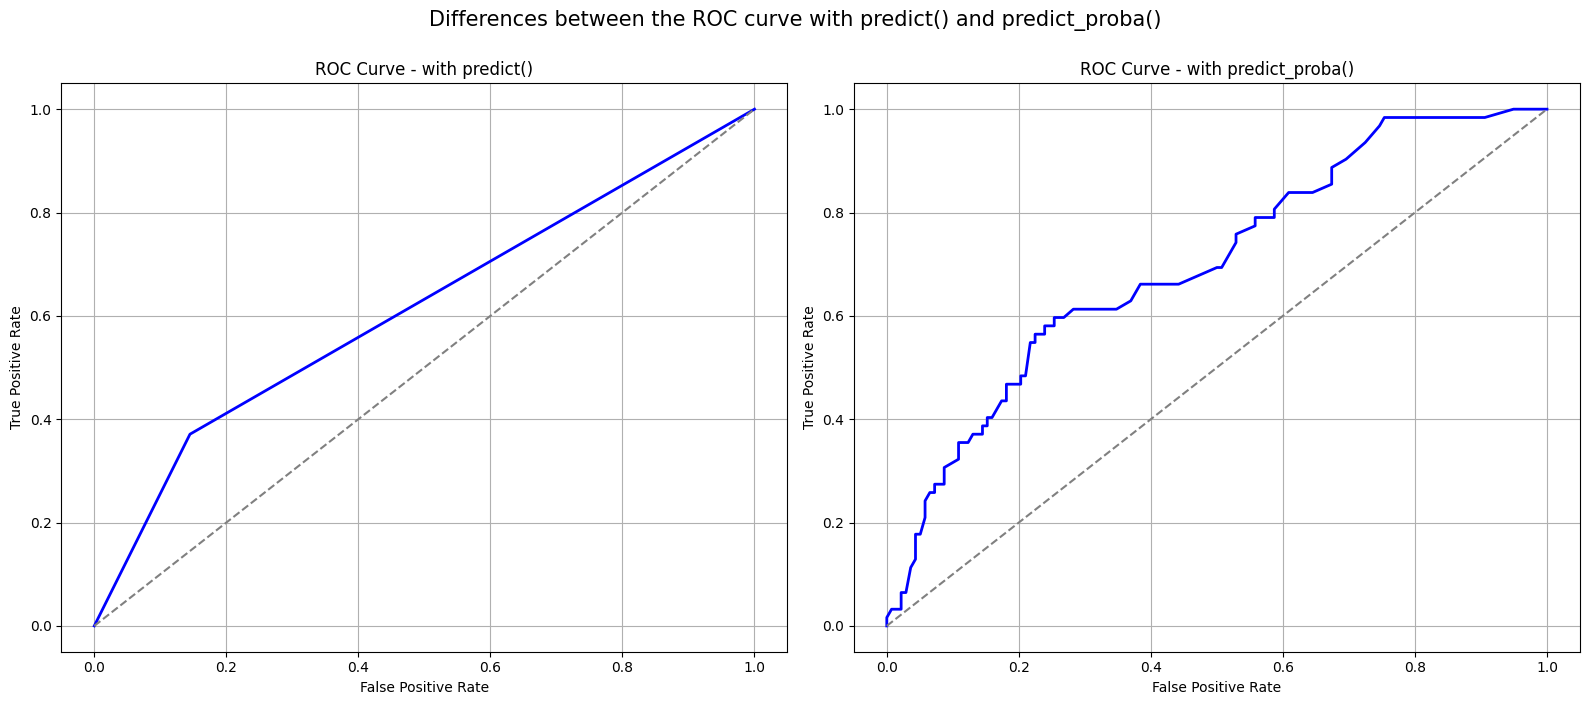

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].plot(fpr1, tpr1, color='blue', lw=2)
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - with predict()')
axes[0].grid(True)

axes[1].plot(fpr2, tpr2, color='blue', lw=2)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - with predict_proba()')
axes[1].grid(True)

plt.suptitle("Differences between the ROC curve with predict() and predict_proba()", y=1.00, fontsize=15)
plt.tight_layout()
plt.show()

**Interpretation of the ROC Curve:**

- The ROC curve shows the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity) at various threshold levels.
- The curve's proximity to the diagonal line (representing random guessing) suggests that the model's discriminative power is moderate. While it performs better than random, it is not highly confident in separating the two classes.

**Strengths of the Model:**

- Feature Selection: Using the top features identified by Random Forest's feature importance helped simplify the model and focus on the most relevant predictors, likely improving interpretability.

- Moderate AUC: The model is moderately capable of distinguishing between individuals with and without CVD, which is a positive sign for further refinement and use in practice.

**Impact of Predictions:**

- A moderate AUC and accuracy suggest that the model can assist in preliminary screening for CVD but should not be solely relied upon for medical decisions. Integrating it with other clinical assessments or models might improve its utility.

**Discussion of AUC with predict() vs predict_proba()**

When calculating AUC, using predict_proba() instead of predict() is critical because:

predict(): This method gives the predicted class labels (0 or 1). For calculating AUC, we need the probability of each instance being classified as the positive class (CVD present, in this case), which is provided by predict_proba().

predict_proba(): This method gives the probability scores for each class (0 and 1). Specifically, want the probabilities for the positive class (CVD present). AUC uses these probability scores to rank predictions, and then plots the True Positive Rate (TPR) vs. False Positive Rate (FPR) at various thresholds.

Additionally the above curve also shows that if we use predict() (which outputs binary predictions), we may lose the granularity of the model’s confidence in its predictions, which makes AUC analysis misleading. The AUC score will be calculated based on the predicted class labels (which are binary), rather than the probabilities that allow the model’s uncertainty to be captured across different decision thresholds.